# Exercise 4

## Import the libraries

In [1152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA


## Load the data

In [1153]:
X = pd.read_csv('creditcard.csv')

# Dropping the CUST_ID column from the data
X = X.drop('CUST_ID', axis = 1)

# Handling the missing values
X.fillna(method ='ffill', inplace = True)

print(X.head())


       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

<ipython-input-1153-40fe016c1c05>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method ='ffill', inplace = True)


## Pre-process the data

In [1154]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)


## Reduce the dimensionality of the data using PCA

In [1155]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())


         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330633  0.268879
3 -0.481656 -0.097611
4 -0.563512 -0.482506


## Train a DBSCAN model using default values

In [1156]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN().fit(X_principal)
labels = db_default.labels_

## Plot the clustered data

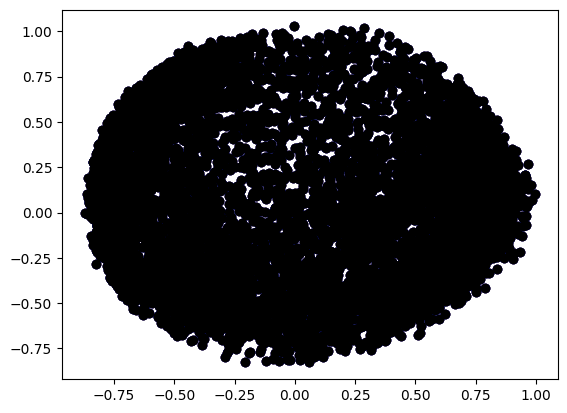

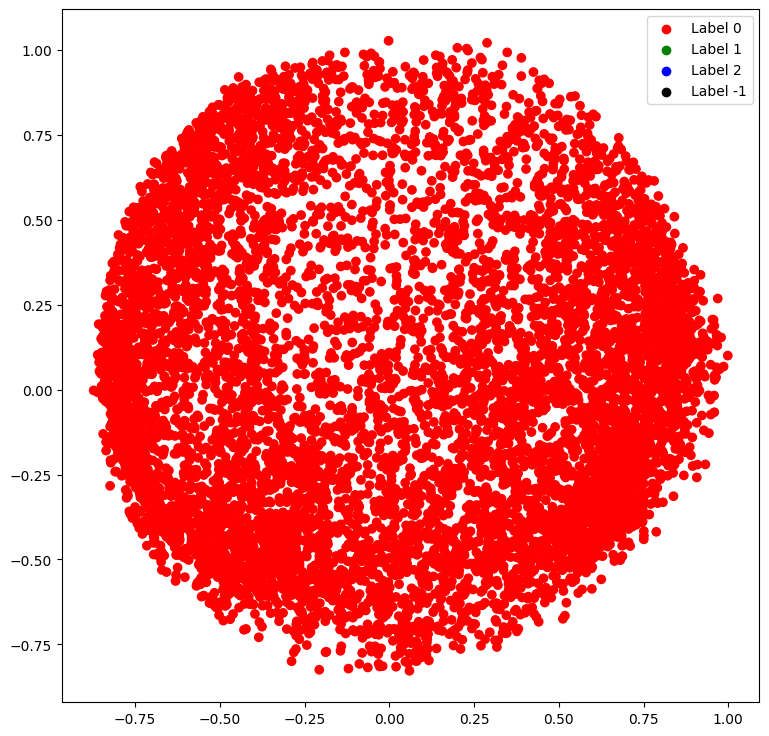

In [1157]:
# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

# For the construction of the legend of the plot
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');

# Plotting P1 on the X-Axis and P2 on the Y-Axis
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)

# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))

plt.show()


1. Train a DBSCAN model

In [1158]:
eps_value = 0.35
min_samples_value = 1500

# Train the DBSCAN model with the custom parameters
db_default = DBSCAN(eps=eps_value, min_samples=min_samples_value).fit(X_principal)

# Get the labels assigned by DBSCAN
labels = db_default.labels_

# Now continue the rest of your code from here onwards

2. Plot the clustered data

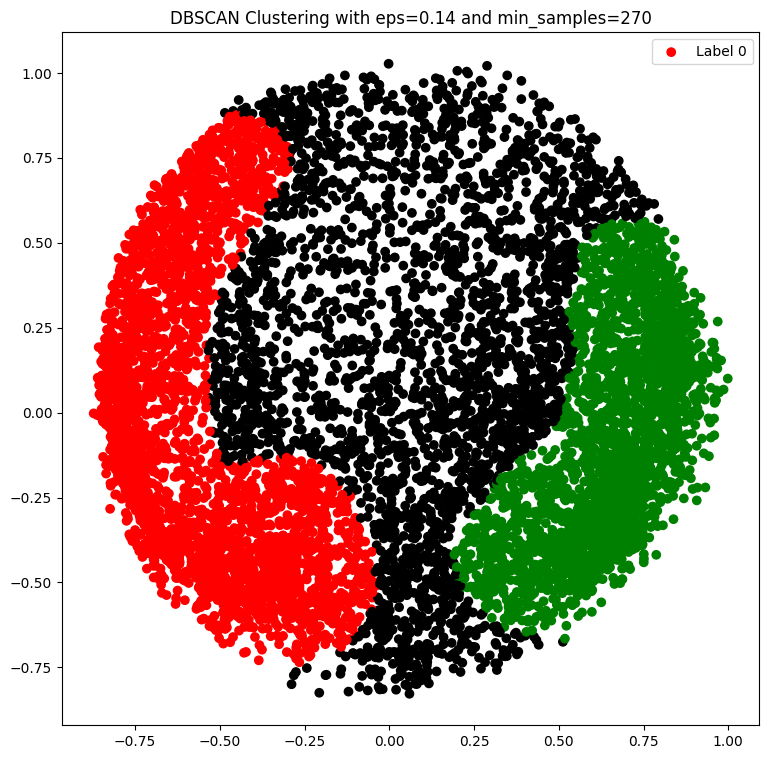

In [1159]:
# Plotting the DBSCAN clusters with the custom eps and min_samples
plt.figure(figsize=(9, 9))

# Assign colors to the clusters
colours = {0: 'r', 1: 'g', 2: 'b', -1: 'k'}  # Red, Green, Blue, Black (for noise)

# Plotting the points with colors based on their cluster label
cvec = [colours[label] for label in labels]  # Color vector for each data point
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)

# Displaying the legend and title
plt.legend(['Label 0', 'Label 1', 'Label 2', 'Label -1'], loc='best')
plt.title(f"DBSCAN Clustering with eps={eps_value} and min_samples={min_samples_value}")

# Show the plot
plt.show()

3. Print the number of clusters

In [1160]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters (excluding noise): {n_clusters}")

Number of clusters (excluding noise): 2


4. Print the number of noisy data

In [1161]:
n_noisy = sum(labels == -1)
print(f"Number of noisy data points: {n_noisy}")


Number of noisy data points: 2893


5. Print the silhouette score

In [1162]:
from sklearn.metrics import silhouette_score

print(metrics.silhouette_score(X_principal, labels))

0.28716154994800647
